## Task 1: Classical ML with Scikit-learn (Iris Dataset)
Goal: Train a Decision Tree Classifier to predict iris species.


Accuracy: 0.9333333333333333
Precision (macro): 0.9333333333333332
Recall (macro): 0.9333333333333332

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



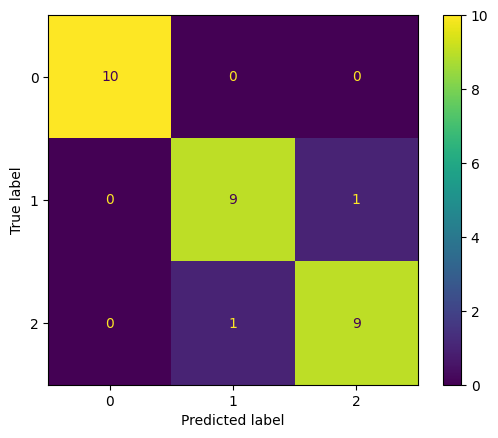

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


## Task 2: Deep Learning with TensorFlow (MNIST Dataset)
Goal: Build and train a CNN to classify handwritten digits.



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.8125 - loss: 0.6165 - val_accuracy: 0.9822 - val_loss: 0.0616
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.9727 - loss: 0.0916 - val_accuracy: 0.9880 - val_loss: 0.0415
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9805 - loss: 0.0620 - val_accuracy: 0.9900 - val_loss: 0.0369
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9837 - loss: 0.0495 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9918 - val_loss: 0.0305
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9915 - val_loss: 0.0313
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9917 - loss: 0.0268 -

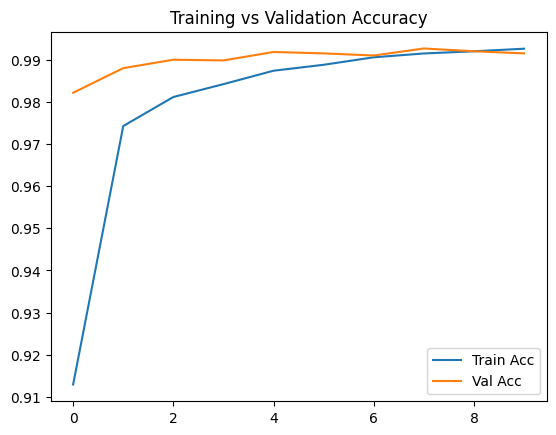

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


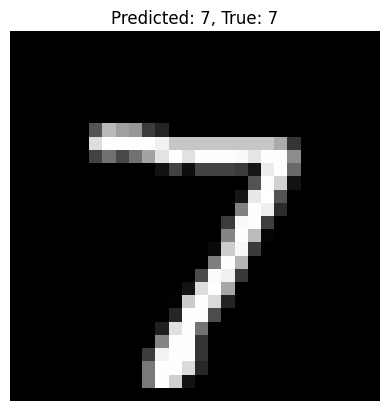

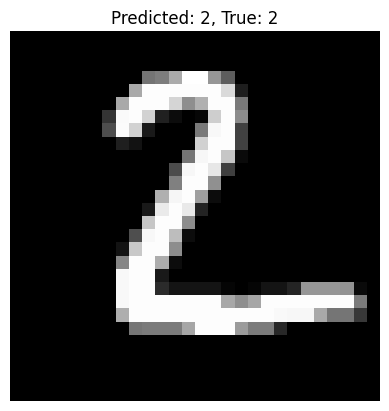

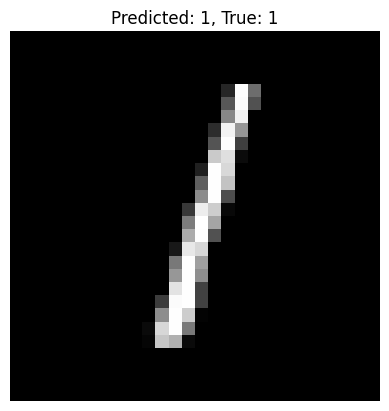

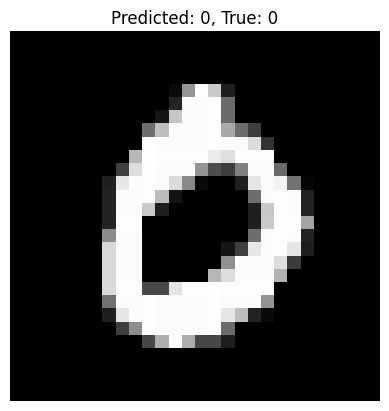

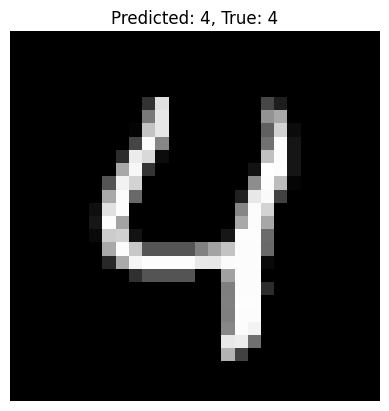

In [2]:
# Import tensorflow and dependencies
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build CNN
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=128)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training performance
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Predict 5 sample digits
preds = model.predict(X_test[:5])
for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(preds[i])}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


## Task 3: NLP with spaCy (Amazon Reviews)
Goal: Extract entities and analyze sentiment.



In [11]:
# === Task 3: NLP with spaCy ===
import spacy
from spacy.pipeline import EntityRuler

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Create the EntityRuler separately, then add it to the pipeline
ruler = nlp.add_pipe("entity_ruler", before="ner")

# Add custom brand and product patterns
patterns = [
    {"label": "BRAND", "pattern": "Samsung"},
    {"label": "BRAND", "pattern": "Apple"},
    {"label": "PRODUCT", "pattern": "iPhone"},
    {"label": "PRODUCT", "pattern": "Galaxy"}
]
ruler.add_patterns(patterns)

# Sample Amazon-like reviews
reviews = [
    "I love my new Samsung Galaxy, it's amazing!",
    "The Apple charger broke after one week, terrible quality.",
    "iPhone 13 camera is perfect and battery life is great."
]

# Simple rule-based sentiment analysis
pos_words = {"love", "great", "perfect", "amazing", "awesome", "excellent"}
neg_words = {"bad", "broke", "terrible", "poor", "disappointed"}

def rule_sentiment(text):
    tokens = text.lower().split()
    score = sum(w in pos_words for w in tokens) - sum(w in neg_words for w in tokens)
    return "positive" if score > 0 else ("negative" if score < 0 else "neutral")

# Run the analysis
for review in reviews:
    doc = nlp(review)
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"\nReview: {review}")
    print("Entities:", ents)
    print("Sentiment:", rule_sentiment(review))



Review: I love my new Samsung Galaxy, it's amazing!
Entities: [('Samsung', 'BRAND'), ('Galaxy', 'PRODUCT')]
Sentiment: positive

Review: The Apple charger broke after one week, terrible quality.
Entities: [('Apple', 'BRAND'), ('one week', 'DATE')]
Sentiment: negative

Review: iPhone 13 camera is perfect and battery life is great.
Entities: [('iPhone', 'PRODUCT'), ('13', 'CARDINAL')]
Sentiment: positive
